<ipython-input-4-cfbaa2a0c091>:54: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(z,r,abs(Edata))


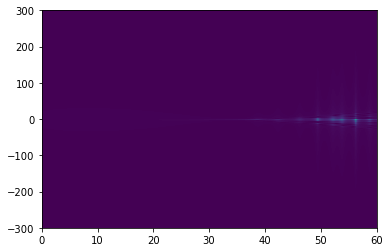

In [4]:


import matplotlib.pyplot as plt
import cmath as m 
import numpy as np

F = 30
lmda = 5
w = 100
k = 2*m.pi/lmda
rpoints = 1000
zrange = 60;
zpoints = zrange*100
Amp=1   
Edata = np.zeros((rpoints,zpoints),dtype=complex)


a = 2/(k*(w**2)) + 1j/F
z = np.linspace(0,zrange,zpoints)
r = np.linspace(-300,300,rpoints)
dr = r[2]-r[1]
dz = z[2]-z[1]

for i in range(rpoints):
    Edata[i,0] = Amp*m.exp(-a*(r[i]**2)*k/2)
#Edata[int(rpoints/2),0]=Edata[int(rpoints/2)-1,0]
integral = sum(Edata[:,0])

"""
for i in range(1,points-1):
    Edata[i,1] = (Edata[i+1,0]-Edata[i,0])/dr
    Edata[i,2] = (Edata[i+1,0]-2*Edata[i,0]+Edata[i-1,0])/dr



plt.plot(r,Edata[:,0],r,Edata[:,1],r,Edata[:,2])
"""

for j in range(1,zpoints):
    for i in range(rpoints):
        if 0<i<rpoints-1:
            Fd = ((Edata[i,j-1]-Edata[i-1,j-1])/dr)/r[i]
            Sd = ((Edata[i+1,j-1]-2*Edata[i,j-1]+Edata[i-1,j])/dr)
            if i == int(rpoints/2):
                Fd = 0
            if i == int((rpoints/2)-1):
                Fd = 0
            Edata[i,j]=Edata[i,j-1]+ (((1j/2*k)*(Sd+Fd))*dz)
        else :
            Edata[i,j]=Edata[i,j-1]
    Edata[int(rpoints/2),j]=Edata[int(rpoints/2)-1,j]
    totalarea = sum(Edata[:,j])
    for i in range(rpoints):
        Edata[i,j] = (Edata[i,j]/totalarea)*integral
    
plt.pcolormesh(z,r,abs(Edata))



In [42]:
Edata[500,0]

(0.9999801910352868-0.005036559260239563j)

C:\Users\jwragg\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


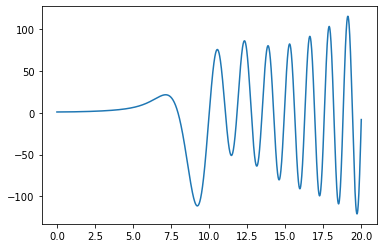

In [47]:
plt.plot(z,Edata[500,:])

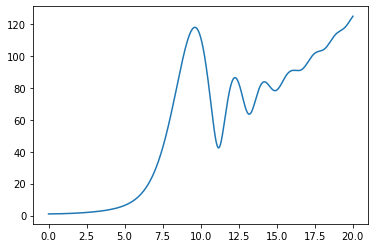

In [48]:
plt.plot(z,abs(Edata[500,:]))


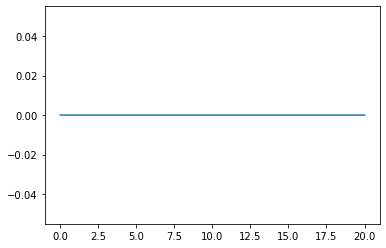

In [49]:
plt.plot(z,abs(Edata[500,:]-Edata[499,:]))

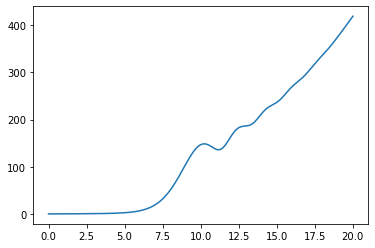

In [50]:
plt.plot(z,abs(Edata[500,:]-Edata[498,:]))

0.0


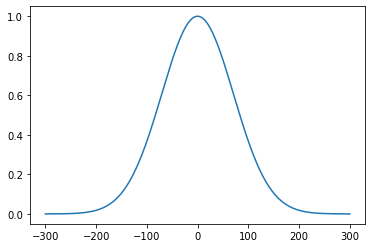

1.0001666944490748


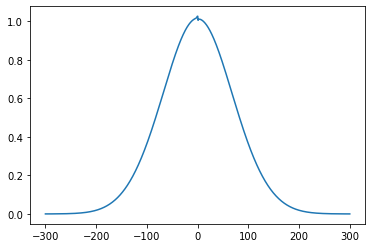

2.0003333888981496


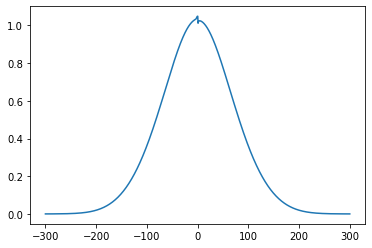

3.000500083347225


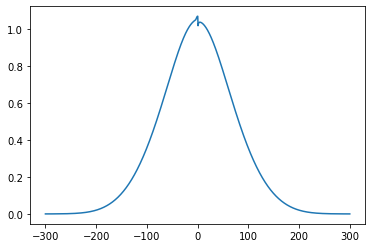

4.000666777796299


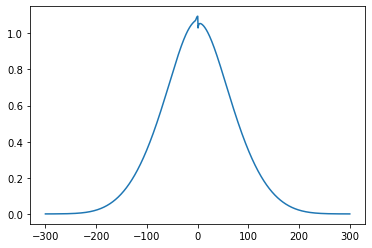

5.0008334722453744


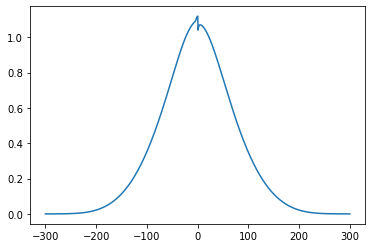

6.00100016669445


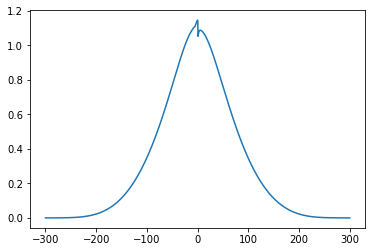

7.001166861143524


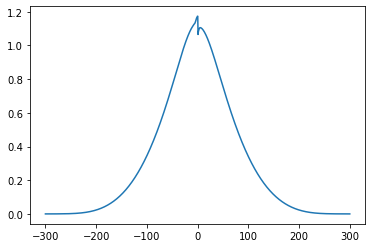

8.001333555592598


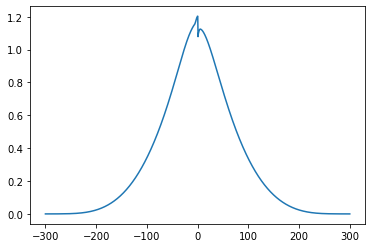

9.001500250041675


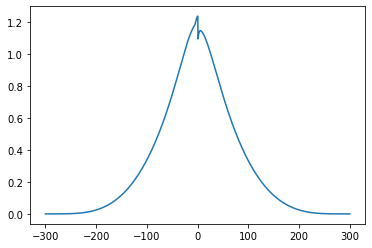

10.001666944490749


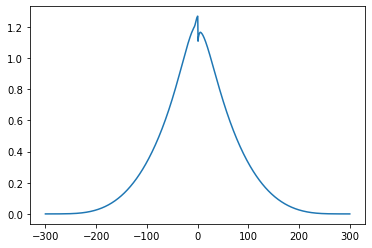

11.001833638939823


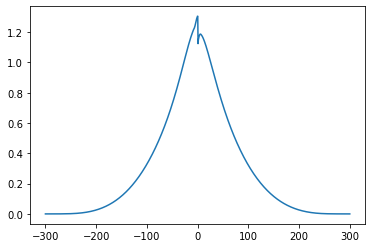

12.0020003333889


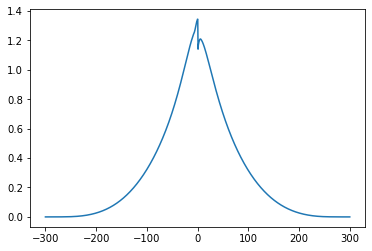

13.002167027837974


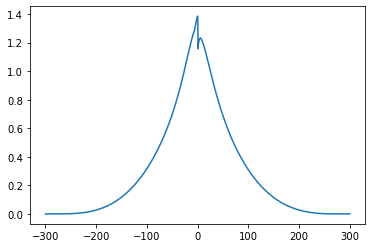

14.002333722287048


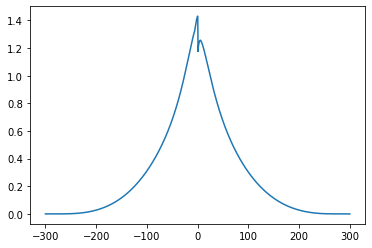

15.002500416736122


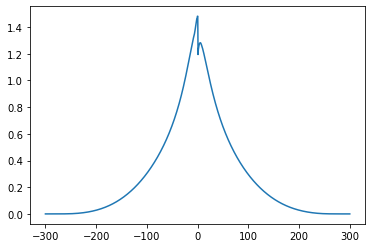

16.002667111185197


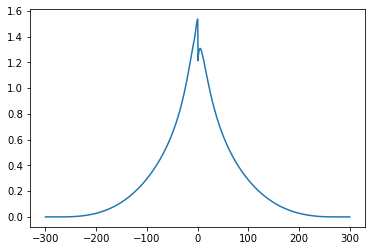

17.002833805634275


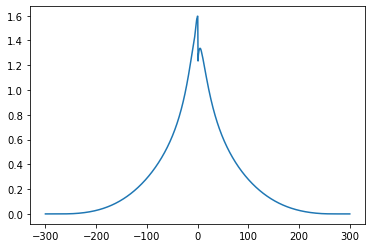

18.00300050008335


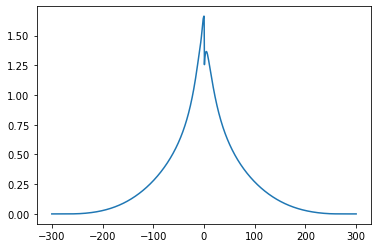

19.003167194532423


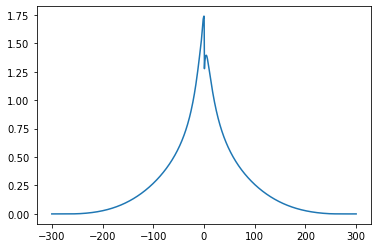

20.003333888981498


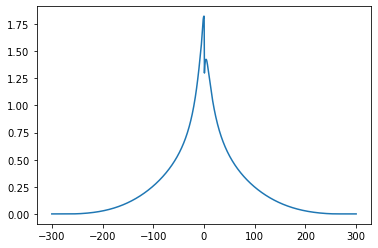

21.003500583430572


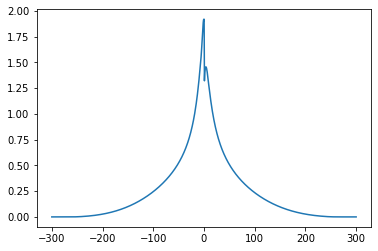

22.003667277879646


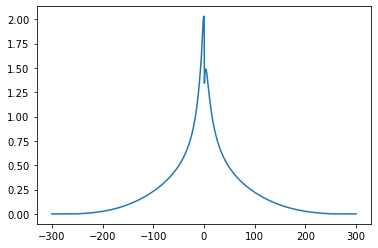

23.00383397232872


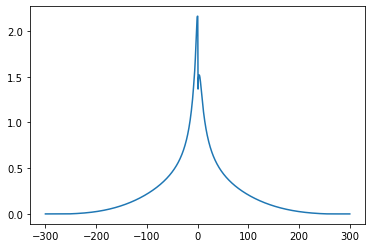

24.0040006667778


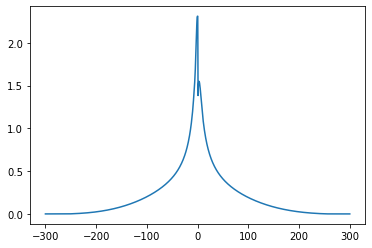

25.004167361226873


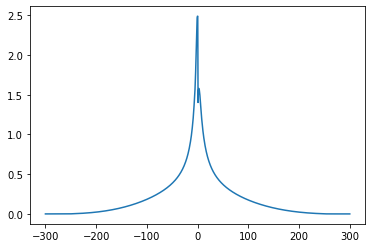

26.004334055675947


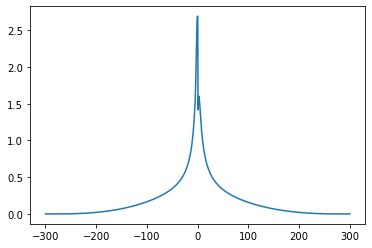

27.004500750125022


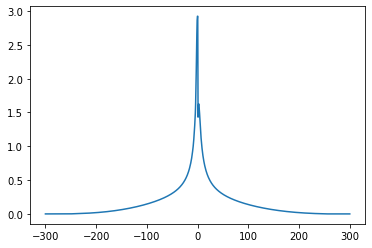

28.004667444574096


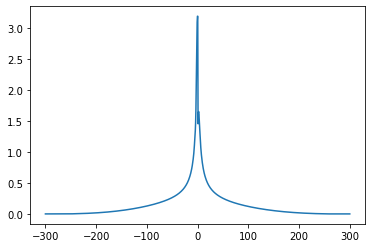

29.00483413902317


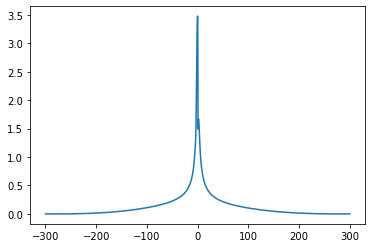

30.005000833472245


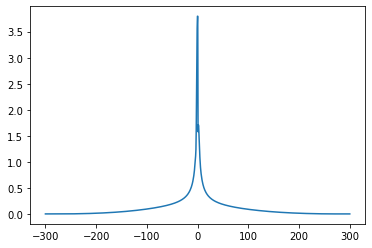

31.005167527921323


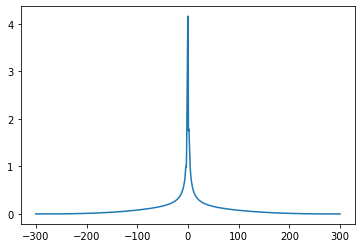

32.005334222370394


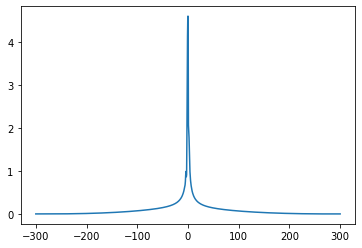

33.00550091681947


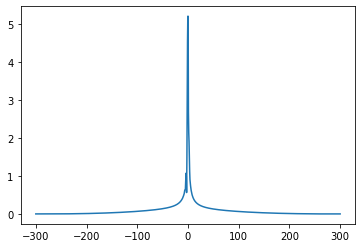

34.00566761126855


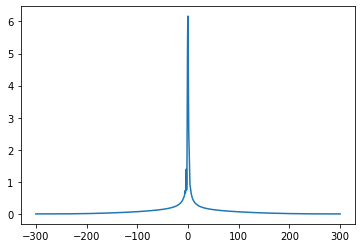

35.00583430571762


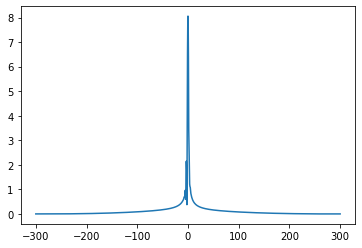

36.0060010001667


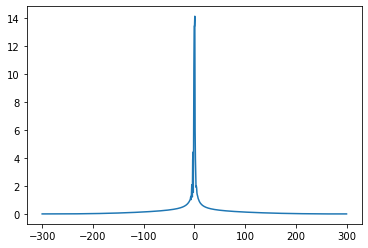

37.00616769461577


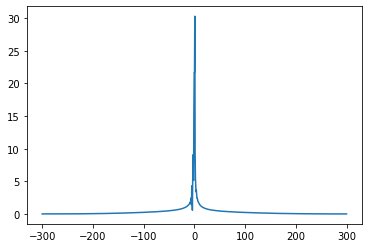

38.00633438906485


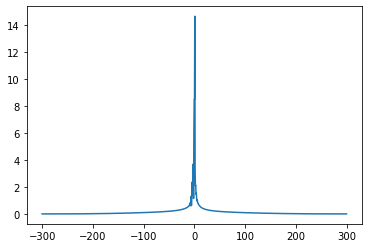

39.00650108351392


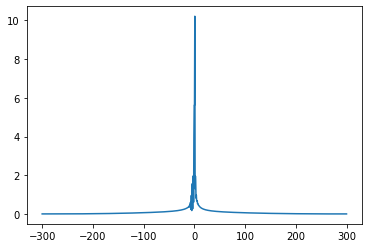

40.006667777962996


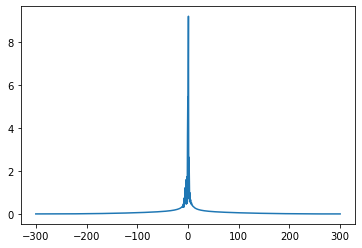

41.00683447241207


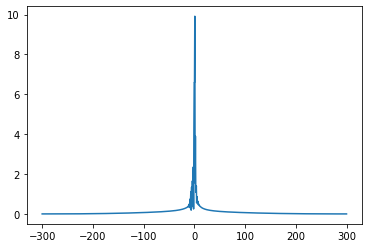

42.007001166861144


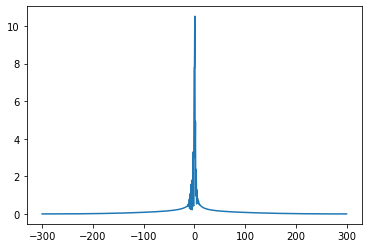

43.00716786131022


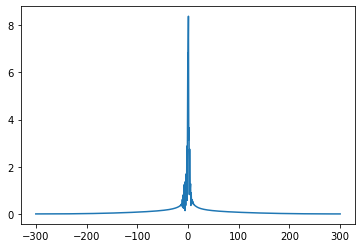

44.00733455575929


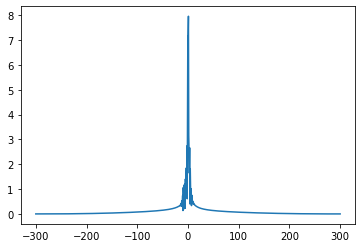

45.00750125020837


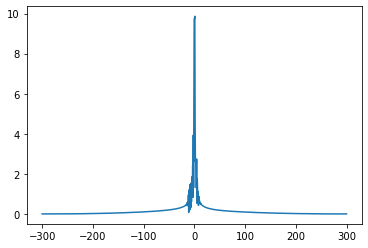

46.00766794465744


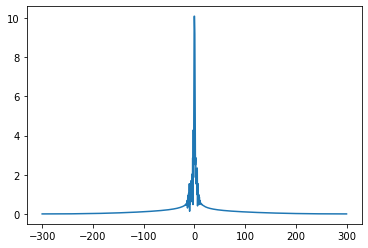

47.00783463910652


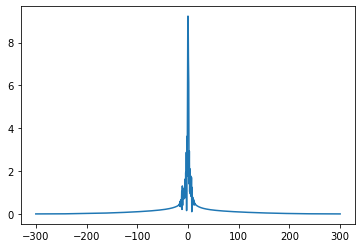

48.0080013335556


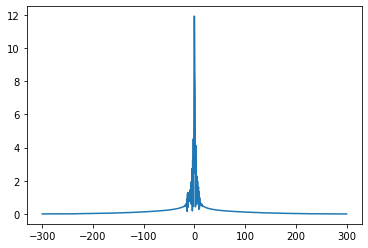

49.00816802800467


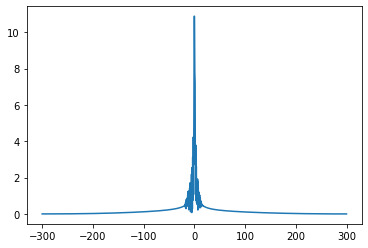

50.008334722453746


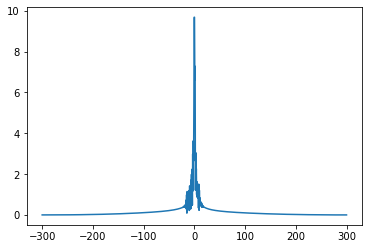

51.00850141690282


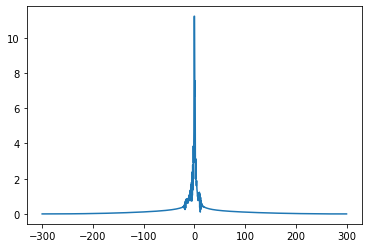

52.008668111351895


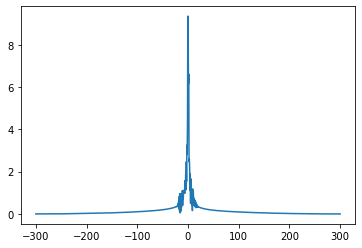

53.008834805800966


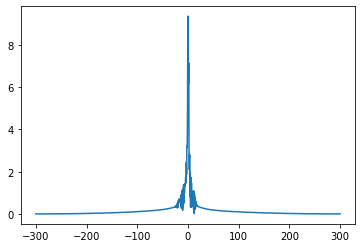

54.009001500250044


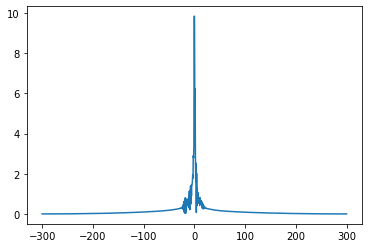

55.00916819469912


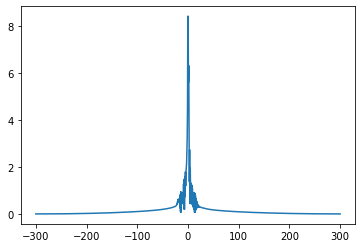

56.00933488914819


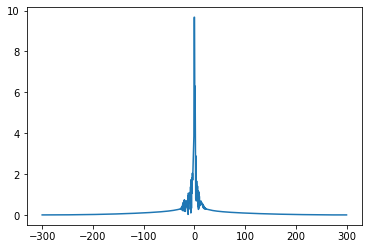

57.00950158359727


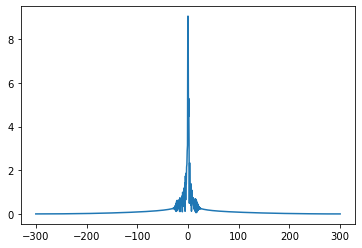

58.00966827804634


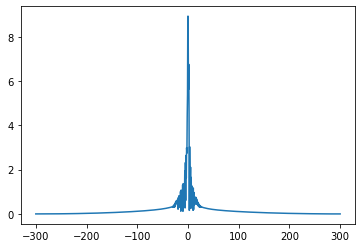

59.00983497249542


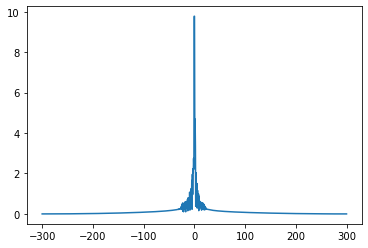

In [2]:



for i in range(int(zpoints/100)):
    
    plt.plot(r,abs(Edata[:,int(i*100)]))
    print(z[int(i*100)])
    plt.pause(0.05)
    
           
    

In [82]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation

fig(ax1) = plt.subplots(1,figsize=(12,12))
beam = ax1.plot(r,abs(Edata[:,zval]))

def animate(zval):
    f = rect(rpoints, zpoints)



SyntaxError: unexpected EOF while parsing (<ipython-input-82-7fe81c8fabec>, line 1)